In [1]:
import richdem as rd
import rasterio as rs

#fl = '../WYMT_SWE/data/dem/mt/mt_dem_180m.tiff'
fl = './data/elev_cm_proj_crop.tif'

In [2]:
def write_rast(outfl,profile,dat):
    '''Write out a raster based on the geospatial data from another raster
    Inputs:
    outfl = raster to write out
    profile = geospatial profile
    dat = array to write out
    
    Outputs: 
    None
    '''
    n,m = dat.shape
    dat = np.reshape(dat,(m,n))
    
        
    with rs.open(outfl,'w',**profile) as dst: # write the new raster based on the profile
        dst.write(dat,1)
        

In [3]:
def plot_rast(rast,label,cmap=plt.cm.terrain,thresh=0):
    rast = np.ma.masked_where(rast<thresh,rast)
    cmap.set_bad(color='w')
    
    vmin = rast.min()
    vmax = rast.max()
    
    plt.figure(figsize=(15,10))
    plt.imshow(rast,vmin=vmin,vmax=vmax,cmap=cmap,interpolation='none')
    cb = plt.colorbar(label = label)
    cb.ax.tick_params(labelsize=12)

In [5]:
# edit the profile

# fix the geotransform
profile['transform'] = rs.guard_transform(profile['transform'])

# fix the data type
profile['dtype'] = 'float64'

/home/tbarnhart/miniconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: GDAL-style transforms are deprecated and will not be supported in Rasterio 1.0.
  after removing the cwd from sys.path.


In [6]:
plot_rast(dem,'Elevation [m]')

MemoryError: 

### Tests:

Timed differences between Dinf (Tarbotton) and D8.

#### Dinf:

In [ ]:
%%timeit -n 10 -r 5
# load the DEM
with rs.open(fl) as ds:
    dem = ds.read(1)
    nd = ds.nodatavals[0]
    profile = ds.profile
dem = np.array(dem,dtype=float)

dem = rd.rdarray(dem,no_data=nd) # create the RDEM instance

# process the DEM
rd.BreachDepressions(dem,mode='Complete',in_place=True)
#rd.FillDepressions(dem,epsilon=True, in_place=True); # fill the DEM in place
accumDinf = rd.FlowAccumulation(dem,method='Dinf');

#### D8:

In [ ]:
%%timeit -n 10 -r 5
# load the DEM
with rs.open(fl) as ds:
    dem = ds.read(1)
    nd = ds.nodatavals[0]
    profile = ds.profile
dem = np.array(dem,dtype=float)

dem = rd.rdarray(dem,no_data=nd) # create the RDEM instance

# process the DEM
rd.BreachDepressions(dem,mode='Complete',in_place=True)
#rd.FillDepressions(dem,epsilon=True, in_place=True); # fill the DEM in place
accumD8 = rd.FlowAccumulation(dem,method='D8');

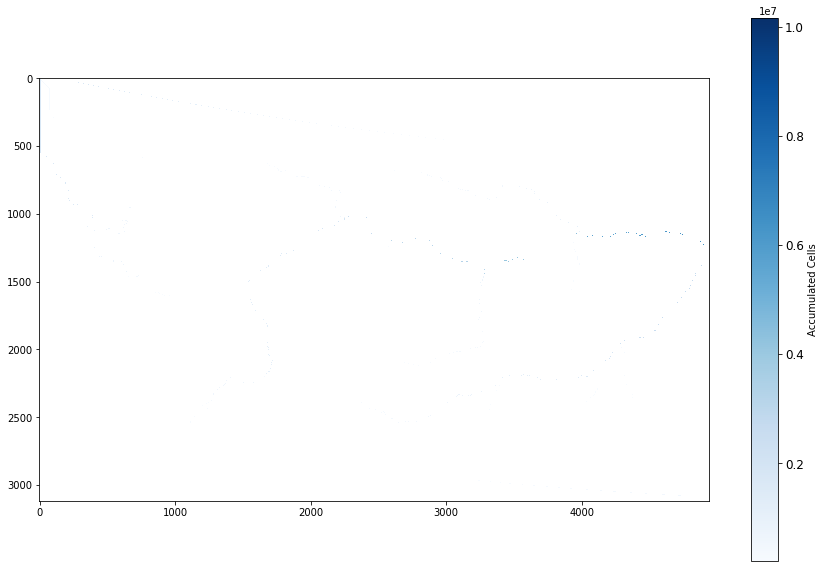

In [46]:
plot_rast(accumDinf,'Accumulated Cells', thresh=200000,cmap=plt.cm.Blues)

In [ ]:
rd.FillDepressions()

In [ ]:
rd.BreachDepressions()

In [ ]:
rd.FlowAccumulation()

In [ ]:
rd.TerrainAttribute()